In [5]:
# Classification and Regression Tree (CART)

# CART is a predictive algorithm used in Machine learning and it explains how the target variable’s values 
# can be predicted based on other matters. It is a decision tree where each fork is split into a predictor variable
# and each node has a prediction for the target variable at the end.

#CART algorithm uses Gini Impurity to split the dataset into a decision tree .
# It does that by searching for the best homogeneity for the sub nodes, with the help of the Gini index criterion.

# Gini index/Gini impurity
#The Gini index is a metric for the classification tasks in CART. It stores the sum of squared probabilities of each class.
# It computes the degree of probability of a specific variable that is wrongly being classified when chosen randomly and
# a variation of the Gini coefficient. It works on categorical variables, provides outcomes either “successful” or “failure”
# and hence conducts binary splitting only.

# The degree of the  Gini index varies from 0 to 1,

# Where 0 depicts that all the elements are allied to a certain class, or only one class exists there.
# The Gini index of value 1 signifies that all the elements are randomly distributed across various classes, and
# A value of 0.5 denotes the elements are uniformly distributed into some classes.


In [6]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings

data = pd.read_csv("C:/Users/Derya/Downloads/Team_Basketball.csv")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"], axis=1).astype("float")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]], axis=1)
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [7]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [25]:
cart_model = DecisionTreeRegressor()

In [26]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

C:\Users\Derya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


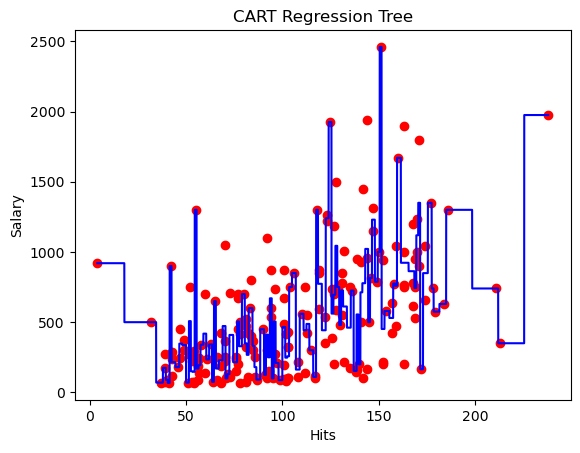

In [27]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART Regression Tree')  
plt.xlabel('Hits') 
plt.ylabel('Salary') ;

In [30]:
from skompiler import skompile

In [34]:
#  print(skompile(cart_model.predict).to('python/code'))

In [32]:
?skompile

In [41]:
x = [91]
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [42]:
cart_model.predict(X_test)[:7]

array([ 725.        , 1230.        ,  725.        ,  504.1665    ,
         67.5       ,  228.66666667,  863.05566667])

In [43]:
cart_model.predict([[91]])

C:\Users\Derya\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([125.])

In [44]:
y_pred =cart_model.predict(X_test)

In [45]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [46]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [47]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [48]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [49]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [50]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [51]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [52]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [53]:
y_pred = cart_tuned.predict(X_test)

In [54]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208